# QUESTION: Speed Control System

Input: \
Ambience temperature - freezing, cool, warm, hot \
Cloud cover - sunny, partly cloudy, overcast 

Output: \
Car speed - slow, fast 

Rules: \
IF the cloud cover was sunny and the temperature was cool, THEN drive fast. \
IF the cloud cover was sunny and the temperature was hot, THEN drive fast. \
IF the cloud cover was cloudy and the temperature was warm, THEN drive slow. \
IF the cloud cover was cloudy and the temperature was cool, THEN drive slow.

Q: What is the car speed if the temperature is 81˚F and cloud cover is 23%?

## 1. Install scikit-fuzzy package & libraries

In [1]:
# install fuzzy package
!pip install -U scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## 2. Declare fuzzy variable and membership function

In [3]:
# new Antecedent/Consequent objects hold universe variables and membership functions

temperature = ctrl.Antecedent(np.arange(0, 111, 1), 'temperature')
cloud_cover = ctrl.Antecedent(np.arange(0, 101, 1), 'cloud_cover')

speed = ctrl.Consequent(np.arange(0, 101, 1), 'speed')

## 3. Create fuzzy membership function for Temperature

D:\Installation\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


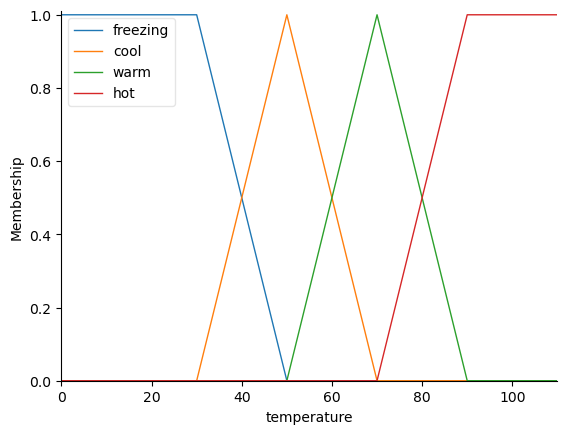

In [4]:
# create membership function for temperature
temperature['freezing'] = fuzz.trapmf(temperature.universe, [0, 0, 30, 50])
temperature['cool'] = fuzz.trimf(temperature.universe, [30, 50, 70])
temperature['warm'] = fuzz.trimf(temperature.universe, [50, 70, 90])
temperature['hot'] = fuzz.trapmf(temperature.universe, [70, 90, 110, 212])

# visualize plot generated 
temperature.view()

## 4. Create fuzzy membership function for Cloud Cover

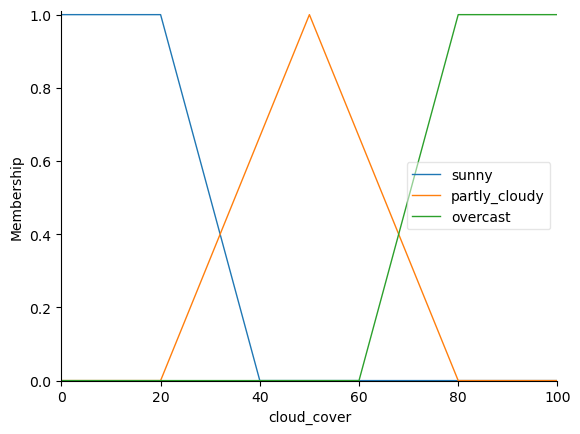

In [5]:
# create membership function for cloud cover
cloud_cover['sunny'] = fuzz.trapmf(cloud_cover.universe, [0, 0, 20, 40])
cloud_cover['partly_cloudy'] = fuzz.trimf(cloud_cover.universe, [20, 50, 80])
cloud_cover['overcast'] = fuzz.trapmf(cloud_cover.universe, [60, 80, 100, 101])

# visualize plot generated 
cloud_cover.view()

## 5. Create fuzzy membership function for Speed

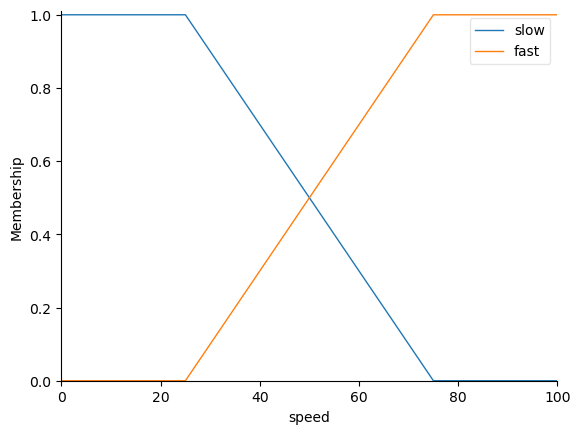

In [6]:
# custom membership function for speed
speed['slow'] = fuzz.trapmf(speed.universe, [0, 0, 25, 75])
speed['fast'] = fuzz.trapmf(speed.universe, [25, 75, 100, 160])

# visualize plot generated 
speed.view()

## 6. Construct fuzzy rules

In [7]:
# create rules
rule1 = ctrl.Rule(cloud_cover['sunny'] & temperature['cool'], speed['fast'])
rule2 = ctrl.Rule(cloud_cover['sunny'] & temperature['hot'], speed['fast'])
rule3 = ctrl.Rule(cloud_cover['partly_cloudy'] & temperature['warm'], speed['slow'])
rule4 = ctrl.Rule(cloud_cover['partly_cloudy'] & temperature['cool'], speed['slow'])

speeding_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
speeding = ctrl.ControlSystemSimulation(speeding_ctrl)

## 7. Defuzzification

Recommended speed: 64.7 mph


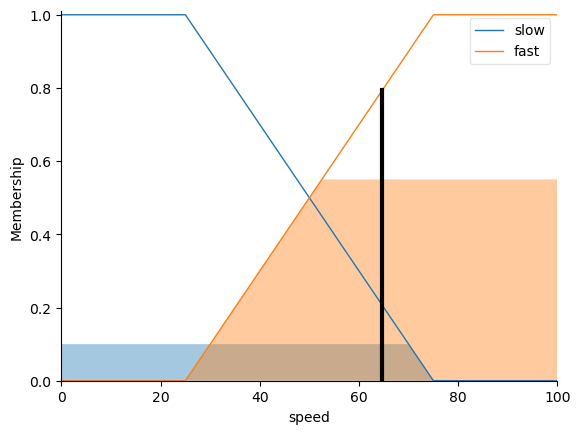

In [16]:
speeding.input['temperature'] = 81
speeding.input['cloud_cover'] = 23
speeding.compute()

print("Recommended speed:", round(speeding.output['speed'], 2), "mph")
speed.view(sim=speeding)